# Выбор локации для скважины

Предположим, что вы работаете в компании, занимающейся добычей нефти. Вам необходимо принять решение о месте бурения новой нефтяной скважины.

В вашем распоряжении имеются данные о пробах нефти из трех регионов, где было произведено измерение качества нефти и объема ее запасов на 10 000 месторождениях в каждом регионе. Ваша задача состоит в том, чтобы построить модель машинного обучения, которая поможет определить регион, в котором добыча нефти принесет наибольшую прибыль. После этого проведите анализ возможной прибыли и рисков с использованием методики Bootstrap.

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

**Описание данных** <br>
Данные геологоразведки трёх регионов находятся в файлах: <br>
*/datasets/geo_data_0.csv <br>
/datasets/geo_data_1.csv <br>
/datasets/geo_data_2.csv* <br>
* id — уникальный идентификатор скважины;
* f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);
* product — объём запасов в скважине (тыс. баррелей).

**Условия задачи:** <br>
Для обучения модели подходит только линейная регрессия (остальные — недостаточно предсказуемые). <br>
При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.
Бюджет на разработку скважин в регионе — 10 млрд рублей. <br>
При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей. <br>
После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью. <br>
Данные синтетические: детали контрактов и характеристики месторождений не разглашаются.

**Инструкция по выполнению проекта**
1. Загрузите и подготовьте данные. Поясните порядок действий.<br>
2. Обучите и проверьте модель для каждого региона: <br>
 2.1. Разбейте данные на обучающую и валидационную выборки в соотношении 75:25.<br>
 2.2. Обучите модель и сделайте предсказания на валидационной выборке.<br>
 2.3. Сохраните предсказания и правильные ответы на валидационной выборке.<br>
 2.4. Напечатайте на экране средний запас предсказанного сырья и RMSE модели.<br>
 2.5. Проанализируйте результаты.<br>
3. Подготовьтесь к расчёту прибыли:<br>
 3.1. Все ключевые значения для расчётов сохраните в отдельных переменных.<br>
 3.2. Рассчитайте достаточный объём сырья для безубыточной разработки новой скважины. Сравните полученный объём сырья со средним запасом в каждом регионе. <br>
 3.3. Напишите выводы по этапу подготовки расчёта прибыли.<br>
4. Напишите функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:<br>
 4.1. Выберите скважины с максимальными значениями предсказаний.<br>
 4.2. Просуммируйте целевое значение объёма сырья, соответствующее этим предсказаниям.<br>
 4.3. Рассчитайте прибыль для полученного объёма сырья.<br>
5. Посчитайте риски и прибыль для каждого региона:<br>
 5.1. Примените технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.<br>
 5.2. Найдите среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.<br>
 5.3. Напишите выводы: предложите регион для разработки скважин и обоснуйте выбор.<br>
 
 *******************

## Загрузка и подготовка данных

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

<div class="alert alert-block alert-success">
<b>Успех:</b> Отлично, что все импорты собраны в первой ячейке ноутбука! Если у того, кто будет запускать твой ноутбук будут отсутствовать некоторые библиотеки, то он это увидит сразу, а не в процессе!
</div>

In [2]:
reg_1 = pd.read_csv('/datasets/geo_data_0.csv')
reg_2 = pd.read_csv('/datasets/geo_data_1.csv')
reg_3 = pd.read_csv('/datasets/geo_data_2.csv')

### Регион 1

In [3]:
reg_1.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [4]:
reg_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [5]:
reg_1.duplicated().sum() 

0

In [6]:
reg_1.describe() 

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


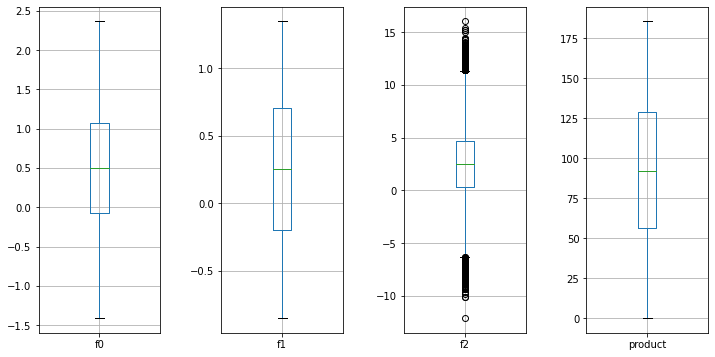

In [7]:
fig, ax = plt.subplots(1, 4, figsize=(12, 6))

reg_1.boxplot('f0', ax=ax[0])
reg_1.boxplot('f1', ax=ax[1])
reg_1.boxplot('f2', ax=ax[2])
reg_1.boxplot('product', ax=ax[3])

plt.subplots_adjust(wspace=0.5) 

plt.show()

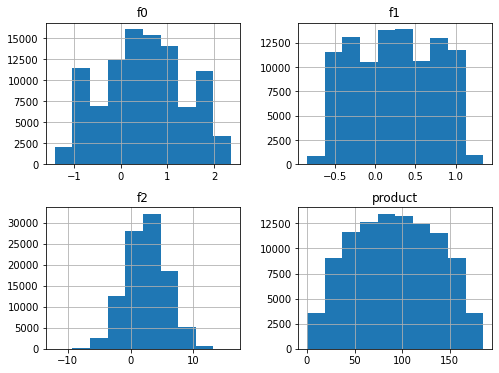

In [8]:
reg_1.hist(figsize=(8,6));

In [9]:
reg_1.corr()

,f0,f1,f2,product
f0,1.000000,-0.440723,-0.003153,0.143536
f1,-0.440723,1.000000,0.001724,-0.192356
f2,-0.003153,0.001724,1.000000,0.483663
product,0.143536,-0.192356,0.483663,1.000000


### Регион 2

In [10]:
reg_2.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [11]:
reg_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [12]:
reg_2.duplicated().sum()

0

In [13]:
reg_2.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


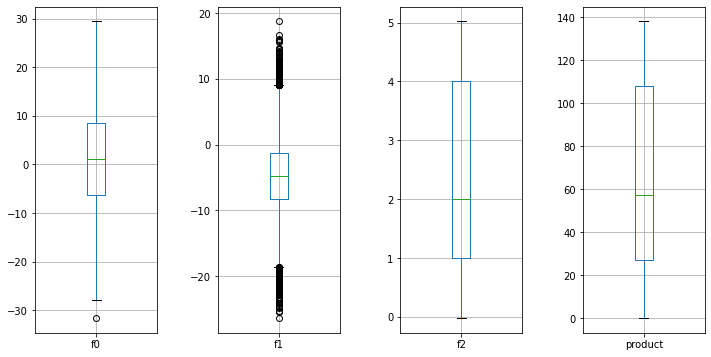

In [14]:
fig, ax = plt.subplots(1, 4, figsize=(12, 6))

reg_2.boxplot('f0', ax=ax[0])
reg_2.boxplot('f1', ax=ax[1])
reg_2.boxplot('f2', ax=ax[2])
reg_2.boxplot('product', ax=ax[3])

plt.subplots_adjust(wspace=0.5) 

plt.show()

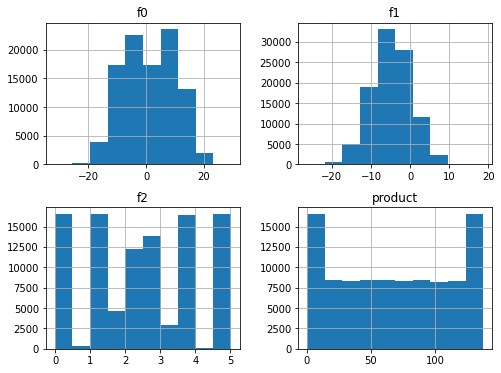

In [15]:
reg_2.hist(figsize=(8,6));

Данные распределены достаточно странно по сравнению с первым регионом.

In [16]:
reg_1['product'].value_counts()

0.000000      1
30.141653     1
56.573577     1
50.182301     1
88.989990     1
             ..
146.560758    1
155.729658    1
27.829511     1
85.382946     1
154.424007    1
Name: product, Length: 100000, dtype: int64

In [17]:
reg_2['product'].value_counts()

53.906522     8472
26.953261     8468
84.038886     8431
57.085625     8390
3.179103      8337
80.859783     8320
30.132364     8306
134.766305    8304
110.992147    8303
0.000000      8235
137.945408    8233
107.813044    8201
Name: product, dtype: int64

In [18]:
reg_2['id'].value_counts()

bfPNe    2
wt4Uk    2
5ltQ6    2
LHZR0    2
mo5uE    1
        ..
Hgrsd    1
bRgmK    1
YrAHM    1
rBuR6    1
KSn6M    1
Name: id, Length: 99996, dtype: int64

In [19]:
reg_2['f2'].value_counts()

3.996243    1
4.003988    1
1.996189    1
0.996936    1
3.998589    1
           ..
1.004759    1
4.997377    1
3.003466    1
0.001041    1
4.992682    1
Name: f2, Length: 100000, dtype: int64

Картина выходит очень странная - информация для столбца product скорее всего была сгенерирована не совсем корректно, так как там всего 12 возможных значений, а уникальных скважин - не 12.  

In [20]:
reg_2.corr()

,f0,f1,f2,product
f0,1.000000,0.182287,-0.001777,-0.030491
f1,0.182287,1.000000,-0.002595,-0.010155
f2,-0.001777,-0.002595,1.000000,0.999397
product,-0.030491,-0.010155,0.999397,1.000000


Стоит заметить, что коэфициент корреляции между f2 и product у второго региона почти равен единице, что указывает об очень сильной линейной связи. Это может быть связано с вышеуказанной дискретностью product.

### Регион 3

In [21]:
reg_3.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [22]:
reg_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       100000 non-null  object 
 1   f0       100000 non-null  float64
 2   f1       100000 non-null  float64
 3   f2       100000 non-null  float64
 4   product  100000 non-null  float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


In [23]:
reg_3.duplicated().sum()

0

In [24]:
reg_3.describe()

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


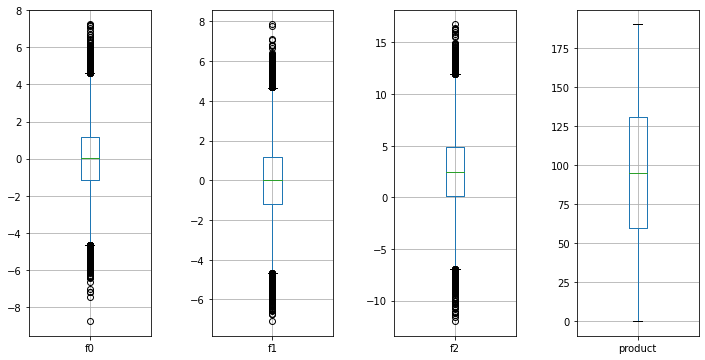

In [25]:
fig, ax = plt.subplots(1, 4, figsize=(12, 6))

reg_3.boxplot('f0', ax=ax[0])
reg_3.boxplot('f1', ax=ax[1])
reg_3.boxplot('f2', ax=ax[2])
reg_3.boxplot('product', ax=ax[3])

plt.subplots_adjust(wspace=0.5) 

plt.show()

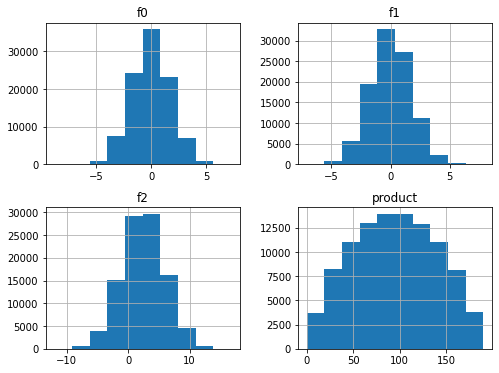

In [26]:
reg_3.hist(figsize=(8,6));

In [27]:
reg_3.corr()

,f0,f1,f2,product
f0,1.000000,0.000528,-0.000448,-0.001987
f1,0.000528,1.000000,0.000779,-0.001012
f2,-0.000448,0.000779,1.000000,0.445871
product,-0.001987,-0.001012,0.445871,1.000000


****
Столбец id не является репрезентативным для предсказания целевого признака - объем нефти в скважине не зависит от ее id, поэтому эти столбцы можно удалить.

In [28]:
reg_1 = reg_1.drop('id', axis=1)
reg_2 = reg_2.drop('id', axis=1)
reg_3 = reg_3.drop('id', axis=1)

In [29]:
print(reg_1.columns)
print(reg_2.columns)
print(reg_3.columns)

Index(['f0', 'f1', 'f2', 'product'], dtype='object')
Index(['f0', 'f1', 'f2', 'product'], dtype='object')
Index(['f0', 'f1', 'f2', 'product'], dtype='object')


**Вывод**:<br>
Для исследования получены синтетические данные о 10 000 месторождениях нефти в 3 регионах в объеме 100 000 строк на регион.
В данных не наблюдается ни пропусков, ни дубликатов; типы данных в столбцах соответсвуют содержимому.<br> 
График "ящик с усами" иллюстрирует наличие выбросов как минимум в одном столбце для каждого региона, но так как данные являются синтетическими, а информация о значении признаков отсутсвует, избавляться от них не представляется корректным. <br>
Коэфициент корреляции между f2 и product у второго региона почти равен единице, что указывает об очень сильной линейной связи, для остальных признаков связь скорее слабая или отсуствующая вовсе. При этом, стоит заметить, что данные у второго региона могли быть сгенерированы не совсем корректно, так как распределение в столбцах f2 и product выглядит странно по сравнению с их распределением у первого и третьего регионов, а значение столбца product дискретно и равномерно принимает 1 из 12 значений.
**********

## Обучение и проверка модели

2. Обучите и проверьте модель для каждого региона: <br>
 2.1. Разбейте данные на обучающую и валидационную выборки в соотношении 75:25.<br>
 2.2. Обучите модель и сделайте предсказания на валидационной выборке.<br>
 2.3. Сохраните предсказания и правильные ответы на валидационной выборке.<br>
 2.4. Напечатайте на экране средний запас предсказанного сырья и RMSE модели.<br>
 2.5. Проанализируйте результаты.<br>

In [30]:
def predict_reserves(df):
    features = df.drop('product', axis=1)
    target = df['product']
    
    features_train, features_valid, target_train, target_valid = train_test_split(features, target, \
                                                                                  test_size=0.25, random_state=12345)
    scaler = StandardScaler()
    pd.options.mode.chained_assignment = None
    scaler.fit(features_train)
    features_train = scaler.transform(features_train)
    features_valid = scaler.transform(features_valid)
    
    model=LinearRegression()
    model.fit(features_train, target_train)
    predictions = pd.Series(model.predict(features_valid))
    rmse = mean_squared_error(predictions, target_valid) ** 0.5
    mean_reserves = predictions.sum() / len(predictions)
    
    print('RMSE:', '%.2f' % rmse)
    print('Средний запас предсказанного сырья:', '%.2f' % mean_reserves)
    return predictions, target_valid.reset_index(drop=True)

In [31]:
predict_reserves_results = []
for index, reg in enumerate([reg_1, reg_2, reg_3], start=1):
    print('Регион', index)
    predict_reserves_results.append(predict_reserves(reg))
    print()

Регион 1
RMSE: 37.58
Средний запас предсказанного сырья: 92.59

Регион 2
RMSE: 0.89
Средний запас предсказанного сырья: 68.73

Регион 3
RMSE: 40.03
Средний запас предсказанного сырья: 94.97



In [32]:
# Сохраните предсказания и правильные ответы на валидационной выборке.
predictions_1, target_1 = predict_reserves_results[0]
predictions_2, target_2 = predict_reserves_results[1]
predictions_3, target_3 = predict_reserves_results[2]

**Вывод:**
Наиболее точные предсказания модель сделала для второго региона, там же получился наименьший средний запас предсказанного сырья. Наибольший средний запас у третьего региона, но там и самая большая ошибка. 
*********

## Подготовка к расчёту прибыли

3. Подготовьтесь к расчёту прибыли:<br>
 3.1. Все ключевые значения для расчётов сохраните в отдельных переменных.<br>
 3.2. Рассчитайте достаточный объём сырья для безубыточной разработки новой скважины. Сравните полученный объём сырья со средним запасом в каждом регионе. <br>
 3.3. Напишите выводы по этапу подготовки расчёта прибыли.<br>

> При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки. Бюджет на разработку скважин в регионе — 10 млрд рублей.
При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.
После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.

In [33]:
TOTAL_WELLS = 500
WELLS = 200
BUDGET = 10 * 10 ** 9
PRICE = 450
PRICE_FOR_B = 450 * 1000
LOSS_PROB = 2.5

In [34]:
BUDGET_FOR_W = BUDGET / WELLS # бюджет на разработку каждой из 200 лучших скважин

In [35]:
BREAK_EVEN = BUDGET_FOR_W / PRICE_FOR_B 
# точка безуботочности для каждой скважины: сколько т. баррелей нужно, чтобы окупиться

In [36]:
BREAK_EVEN

111.11111111111111

In [37]:
target_1.mean()

92.07859674082927

In [38]:
target_2.mean()

68.72313602435997

In [39]:
target_3.mean()

94.88423280885438

**Вывод**: средний объем запасов во всех регионах меньше точки безубыточности. Значит, часть скважин будут убыточными.

4. Напишите функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:<br>
 4.1. Выберите скважины с максимальными значениями предсказаний.<br>
 4.2. Просуммируйте целевое значение объёма сырья, соответствующее этим предсказаниям.<br>
 4.3. Рассчитайте прибыль для полученного объёма сырья.<br>

In [40]:
def calculate_profit(predictions, target):
    best_wells = predictions.sort_values(ascending=False)
    reserves_sum = target[best_wells.index][:200].sum()
    profit = reserves_sum * PRICE_FOR_B - BUDGET
    return profit

******
## Расчёт прибыли и рисков 

5. Посчитайте риски и прибыль для каждого региона:<br>
 5.1. Примените технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.<br>
 5.2. Найдите среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.<br>
 5.3. Напишите выводы: предложите регион для разработки скважин и обоснуйте выбор.<br>

> Риск — сочетание вероятности и последствий наступления событий.

Вероятность наступления события A рассчитывается как P (A) = m/n, где n — общее число всех равновозможных, элементарных исходов этого испытания, а m — количество элементарных исходов, благоприятствующих событию A. <br>
Соответственно, риск убытков (отрицательной прибыли) будем считать как число всех исходов с отрицательной прибылью к общему числу исходов.

In [41]:
state = np.random.RandomState(12345)

In [42]:
def calculate_risks_and_profit(predictions, target, conf_int):
    profit = []
    for i in range(1000):
        target_subsample = target.sample(n=TOTAL_WELLS, replace=True, random_state=state)
        pred_subsample = predictions[target_subsample.index]
        profit.append(calculate_profit(pred_subsample, target_subsample))

    profit = pd.Series(profit)
    mean_profit = profit.mean()
    
    conf_int_half = (100 - conf_int) / (100 * 2)
    lower = round(profit.quantile(0 + conf_int_half), 2)
    higher = round(profit.quantile(1 - conf_int_half), 2)

    
    risk = (profit < 0).mean() * 100
    mean_profit = round(profit.mean(), 2)
    print('Средняя прибыль:', mean_profit)
    print(f'Доверительный интервал: от {lower} до {higher}')
    if risk > LOSS_PROB:
          print(f'Риск превосходит допустимый порог, cоставляет {risk}%')
    else:
        print(f'Риск ниже допустимого порога, составляет {risk}%')
    return mean_profit, lower, higher, risk

In [43]:
risks_profit = []
print('Регион 1')
risks_profit.append(calculate_risks_and_profit(predictions_1, target_1, 95))

Регион 1
Средняя прибыль: 425938526.91
Доверительный интервал: от -102090094.84 до 947976353.36
Риск превосходит допустимый порог, cоставляет 6.0%


In [44]:
print('Регион 2')
risks_profit.append(calculate_risks_and_profit(predictions_2, target_2, 95))

Регион 2
Средняя прибыль: 518259493.7
Доверительный интервал: от 128123231.43 до 953612982.07
Риск ниже допустимого порога, составляет 0.3%


In [45]:
print('Регион 3')
risks_profit.append(calculate_risks_and_profit(predictions_3, target_3, 95))

Регион 3
Средняя прибыль: 420194005.34
Доверительный интервал: от -115852609.16 до 989629939.84
Риск превосходит допустимый порог, cоставляет 6.2%


In [46]:
pr_df = pd.DataFrame(risks_profit, columns = ['Средняя прибыль', 'Низ дов. инт.', 'Верх дов. инт.', 'Риск убытков'])

In [47]:
pr_df

,Средняя прибыль,Низ дов. инт.,Верх дов. инт.,Риск убытков
0,4.259385e+08,-1.020901e+08,9.479764e+08,6.0
1,5.182595e+08,1.281232e+08,9.536130e+08,0.3
2,4.201940e+08,-1.158526e+08,9.896299e+08,6.2


**Вывод**: <br>
Для исследования получены синтетические данные о 10 000 месторождениях нефти в 3 регионах в объеме 100 000 строк на регион. <br>
В ходе исследования удалось выяснить, что средний объем запасов сырья в представленных регионах недостаточен для безубыточной разработки новых скважин. <br> 
Единственный регион, подходящий для разработки, - это второй. Риск убытков в нем не превышает заданный порог в 2,5% и составляет 0,3%, средняя прибыль составляет 518 259 493.7 миллионов рублей, и нижняя граница 95% доверительного интервала по средней прибыли лежит в пределах положительных значений.